# **Super Bowl TV Viewership**

# **Data Engineering**

--------------------------------
## **Project Purpose** 
-------------------------------

The purpose of this project is to understand the popularity of National Football League (NFL) of the United States. This project explores the arguably the biggest night in football, the Super Bowl, using data engineering. The Super Bowl typically occurs on a Sunday night in the first weekend of February. Over the years, the Super Bowl has evolved becoming more sophisticated in strategy and data analytics. 

--------------------------------
## **Nielsen Ratings Data** 
-------------------------------

Nielsen collects and analyzes audience data across various media platforms. Nielsen is a company in the United States that started measuring radio ratings in the 1930s. Later in the 1950s, it started measuring TV ratings using metering technology. Nielsen takes a sample group to represent homes in the United States to reflect the entire population. January 2024, Nielsen increased its sample group from 25,000 households to 41,000 households (100,000 people). Nielsen uses electronic meters to monitor TV viewership, which sends viewership data back to Nielsen. This data is then used to inform advertisering clients, which commerical blocks.  

For local TV ratings, 2 million paper diaries are sent out to local viewers in February, May, July, and November. The diaries are later collected and analyzed. Conversely, for streaming systems audio files on streamed shows that provide viewership data based on the audio data from the shows watched.

For example, if a show like Bridgerton has 5.0 household rating/10 share. This means that 5.0 or 5% of all households with a TV watched the show. 10 share means that 10% of households with TVs are watching at anytime (Forbes, December 2015).

NEW YORK – February 13, 2024 – An estimated 123.7 million viewers tuned in for Super Bowl LVIII on Sunday, February 11, according to average audience estimates from Nielsen. The broadcast averaged 120.3 million viewers on CBS alone, making it the largest audience for a single-network telecast to date. An additional 2.3 million viewers watched the Spanish-language broadcast on Univision, and 1.2 million tuned in to watch the kid-friendly broadcast on Nickelodeon and Nick-at-Nite.

The overtime thriller between the San Francisco 49ers and the Kansas City Chiefs drew a combined average household rating of 43.5, and combined household share of 83. In total, year-over-year viewership was up 7.4% from 2023. 

The broadcast of Super Bowl LVIII ran from approximately 6:40 PM ET to 10:45 PM ET on CBS, Univision, Nickelodeon and Nick-at-Nite. Audience estimates are also inclusive of digital (DTVR) and Out-Of-Home (OOH) viewing, and viewing via MVPD/vMVPDs, Paramount+, and digital properties of CBS Sports, Univision and the NFL, including NFL+ (Nielsen, February 2024).

# **Webscraping TV Viewership**

In [1]:
!pip install selenium

In [2]:
# Import Splinter and BeautifulSoup and other relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
from bs4 import BeautifulSoup

In [3]:
# Initialize Chrome browser with automatic chromedriver management
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()

# **Step 1: Visit the Website**
1. Use automated browsing to visit the Nieslen Rating Website. Inspect the page to identify which elements to scrape.

Hint To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools.

In [4]:
# Pass the service to the browser instead of driver_executable_path
browser = Browser('chrome', options=options, service=service, headless=False)

In [5]:
#Visit the Nielsen Ratin Website
url = 'https://www.nielsen.com/news-center/2024/super-bowl-lviii-draws-123-7-million-average-viewers-largest-tv-audience-on-record/'
browser.visit(url)

# **Step 2: Scrape the Website**

2. Create a Beautiful Soup object and use it to extract text elements form the website.

In [6]:
# Create a Beautiful Soup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [143]:
#print(soup)

In [7]:
# Extract all rows of data
table = soup.find_all('tr')
#rows = table.find_all('tr')

In [145]:
#print(table)

In [146]:
#print(rows)

# **Step 3: Store the Data**
Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

Super Bowl: the identification number of the Super Bowl Number. 
Example: LVIII is the Greek Number for 58, so Super Bowl LVIII is the 58th Super Bowl. Super Bowl LVIII happened in Feb. 11, 2024.

Network(s): the United States Televsion Networks
Example: ESPN OR NBC.

Total Viewers P2+: the total number of viewers in the millions. 
Example: approximately 20,000,000-130,000,000.

HHLD (Household) Rating: the rating or the percentage of Nielsen's panel that watched a specific program. The Nielsen Ratings
collect and calculate data uses meters and people meters. Meters are attached to TVs, which records the viewership data and sent to a data center. People meters is a devices that can be attached to a remore or worn as clip/wristband.
Example: 43.2 means 43.2% of panel watched the program. 

Date: the date of the Super Bowl broadcast.
Example: Feb.11,2024 is the date when the Superbowl occured and was broadcasted live.

In [147]:
# Create an empty list to store the table data
#table_data = []

# Loop through the rows of the table
#for row in table.find_all('tr'):
    #columns = row.find_all('td')

    #if columns:
        # Handle multi-line networks by joining them
        #networks = columns[1].text.strip().replace("\n", ", ")
        # Append the row to the table_data list
        #table_data.append([
            #columns[0].text.strip(),  # Super Bowl
            #networks,                 # Networks (handle multi-line cases)
            #columns[2].text.strip(),  # Total Viewers P2+
            #columns[3].text.strip(),  # HHLD Rating
            #columns[4].text.strip()   # Date
        #])

# Output the scraped data
#for row in table_data:
    #print(row)

In [8]:
##Ask for help with code for the for loop

# Initialize empty lists to store data
years, networks, viewers, ratings, dates = [], [], [], [], []

# Iterate through each row in the table
for row in soup.find_all('tr')[1:]:  # Skipping the header row
    cells = row.find_all('td') #columns
    if len(cells) > 0:
        years.append(cells[0].get_text(strip=True))
        networks.append(cells[1].get_text(strip=True))
        viewers.append(cells[2].get_text(strip=True))
        ratings.append(cells[3].get_text(strip=True))
        dates.append(cells[4].get_text(strip=True))

# Create a DataFrame from the scraped data
data = pd.DataFrame({
    'Super_Bowl': years, #renamed columns
    'Network(s)': networks,
    'Total_Viewers': viewers,
    'HHLD_Rating': ratings,
    'Date': dates
})

# Save the DataFrame to a CSV file
data.to_csv('super_bowl_audience_data.csv', index=False)

print("Data has been successfully scraped and saved to 'super_bowl_audience_data.csv'") #created a csv file


Data has been successfully scraped and saved to 'super_bowl_audience_data.csv'


In [9]:
#Read the csv file
data = pd.read_csv('super_bowl_audience_data.csv')

In [150]:
#View Data
data.head()

,Super_Bowl,Network(s),Total_Viewers,HHLD_Rating,Date
0,LVIII,"CBS, Univision,Nickelodeon, Nick-at-Nite","123,714,000",43.5,"Feb. 11, 2024"
1,LVII,FOXFOX Deportes,"115,096,000",40.7,"Feb. 12, 2023"
2,LVI,NBCTelemundo,"101,470,000",37.9,"Feb. 13, 2022"
3,LV,CBSESPN Deportes,"95,877,000",38.4,"Feb. 7, 2021"
4,LIV,FOXFOX Deportes,"102,086,000",42.0,"Feb. 2, 2020"


# **Step 4: Prepare Data for Analysis**

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

Hint You can use the Pandas astype and to_datetime methods to accomplish this task.

In [10]:
# Examine data type of each column
data.dtypes

Super_Bowl        object
Network(s)        object
Total_Viewers     object
HHLD_Rating      float64
Date              object
dtype: object

In [31]:
len(data)

59

# **Step 5: Analyze the Data**
Analyze your dataset by using Pandas functions to answer the following questions:

1. How many Super Bowls?
2. How many Total Viewers of data exist in the scraped dataset?
3. How many HHLD Ratings are there?
4. What is the least viewed and most viewed Super Bowls?
   Find the minimum and maximum Super Bowl of all Super Bowls watched.
   Plot the results as a bar chart.
5. What is the average viewship of the Super Bowl?
6. Which months have the lowest and the highest watched Super Bowl? To answer this question:
   Find the average the daily watched Super Bowl of all the months.
   Plot the results as a bar chart.

In [11]:
#Counts for Super Bowl
data.value_counts('Date')

Date
Jan. 15, 1967    2
Jan. 26, 1992    1
Jan. 17, 1971    1
Jan. 18, 1976    1
Jan. 20, 1980    1
Jan. 20, 1985    1
Jan. 21, 1979    1
Jan. 22, 1984    1
Jan. 22, 1989    1
Jan. 24, 1982    1
Jan. 25, 1981    1
Jan. 25, 1987    1
Jan. 25, 1998    1
Jan. 26, 1986    1
Feb. 1, 2004     1
Jan. 16, 1972    1
Jan. 26, 2003    1
Jan. 27, 1991    1
Jan. 28, 1990    1
Jan. 28, 1996    1
Jan. 28, 2001    1
Jan. 29, 1995    1
Jan. 30, 1983    1
Jan. 30, 1994    1
Jan. 30, 2000    1
Jan. 31, 1988    1
Jan. 31, 1993    1
Jan. 31, 1999    1
Jan. 26, 1997    1
Jan. 15, 1978    1
Feb. 1, 2009     1
Jan. 14, 1973    1
Feb. 1, 2015     1
Feb. 11, 2024    1
Feb. 12, 2023    1
Feb. 13, 2022    1
Feb. 2, 2014     1
Feb. 2, 2020     1
Feb. 3, 2002     1
Feb. 3, 2008     1
Feb. 3, 2013     1
Feb. 3, 2019     1
Feb. 4, 2007     1
Feb. 4, 2018     1
Feb. 5, 2006     1
Feb. 5, 2012     1
Feb. 5, 2017     1
Feb. 6, 2005     1
Feb. 6, 2011     1
Feb. 7, 2010     1
Feb. 7, 2016     1
Feb. 7, 2021     1
Jan. 11

**Data Engineering Method 1**: Webscraped Super Bowl TV Viewership table from Nielsen Ratings. Used Beautiful Soup. For educational purposes.

# **Data Visualization**

<Axes: title={'center': 'Super Bowl Household Rating 1967-2024'}, xlabel='Date', ylabel='HHLD_Rating'>

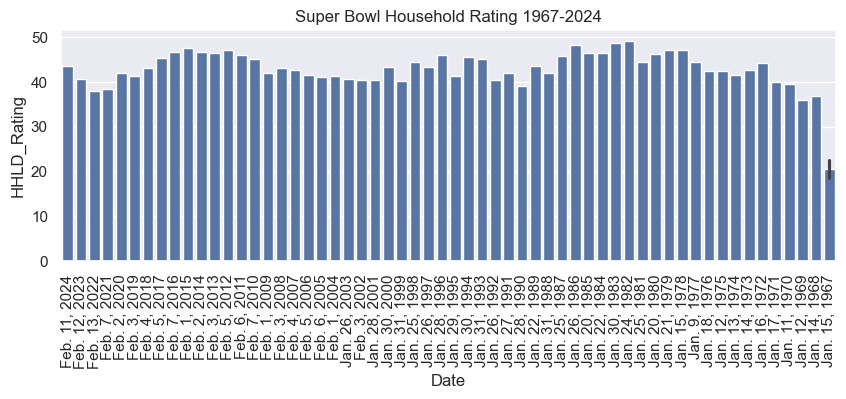

In [57]:
# Household ratings bar plot. Shows the frequency of the household ratings by date in the graph. 

plt.figure(figsize=(10,3))
plt.title("Super Bowl Household Rating 1967-2024")
plt.xticks(rotation=90)
sns.barplot(x=data["Date"], y=data["HHLD_Rating"])

**Bar Plot Observations**: Is also known as the count plot. This graph is showing the frequency of the household ratings by date. Or how often a particular count, the household in this case, is shown in the graph.For instance Jan. 24,1982 has almost a rating of 50.

Network(s)
CBS                                         18
NBC                                         17
ABC                                          7
FOX                                          6
FOXFOX Deportes                              4
CBSESPN Deportes                             3
NBCUniverso                                  2
CBS, Univision,Nickelodeon, Nick-at-Nite     1
NBCTelemundo                                 1
Name: count, dtype: int64

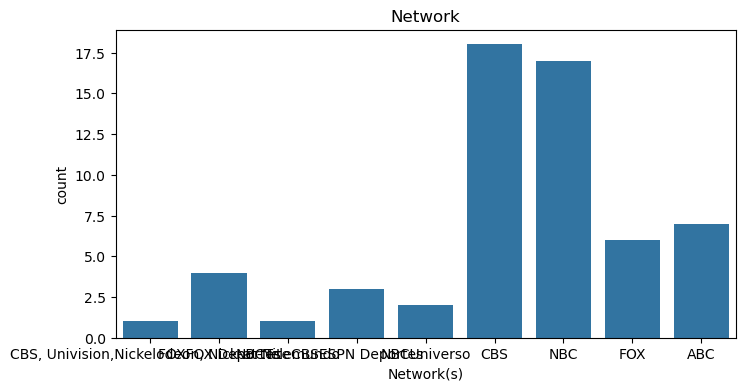

In [12]:
#Bar plot of the Networks

plt.figure(figsize=(8,4))
plt.title("Network")
sns.countplot(x=data['Network(s)'])
data['Network(s)'].value_counts()

**Count Plot Observations**: Is also known as the count plot. This graph is showing the frequency of the Networks. Or how often a particular count, network(s) in this case, is shown in the graph.

In [70]:
#Install bubbly for bubble chart
!pip install bubbly

In [3]:
#Import libraries

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff



import warnings
warnings.filterwarnings('ignore')

In [16]:
#Average Superbowl rating

print('Average Super Bowl Rating = ', np.mean(data['HHLD_Rating']))

Average Super Bowl Rating =  42.49322033898305


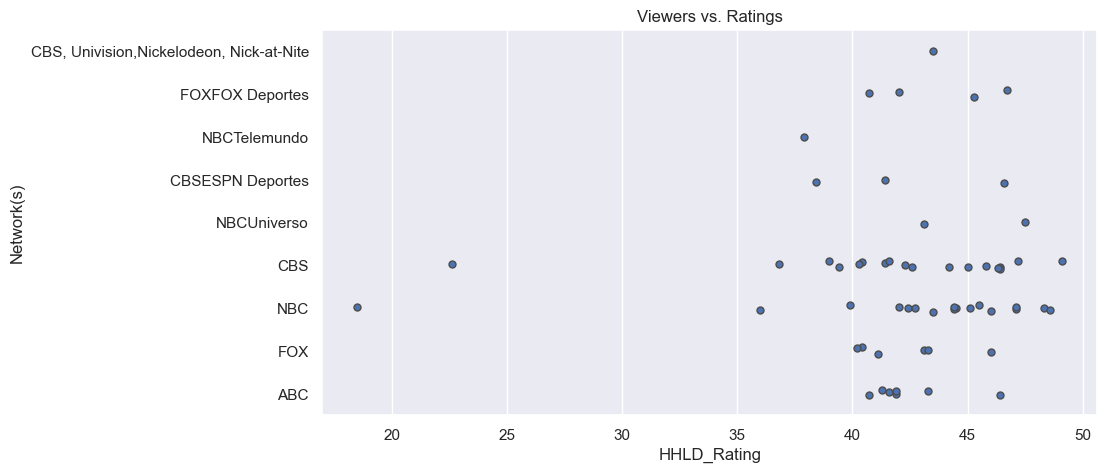

In [30]:
#Strip Plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
p = sns.stripplot(x="HHLD_Rating", y="Network(s)", data=data, jitter=True, linewidth=1)
title = ax.set_title('Viewers vs. Ratings')

**Strip Plot Observation**: Allows for individual data points to be seen without the ovrelapping of points. Characteristically, 
it is similiar to a scatterplot.

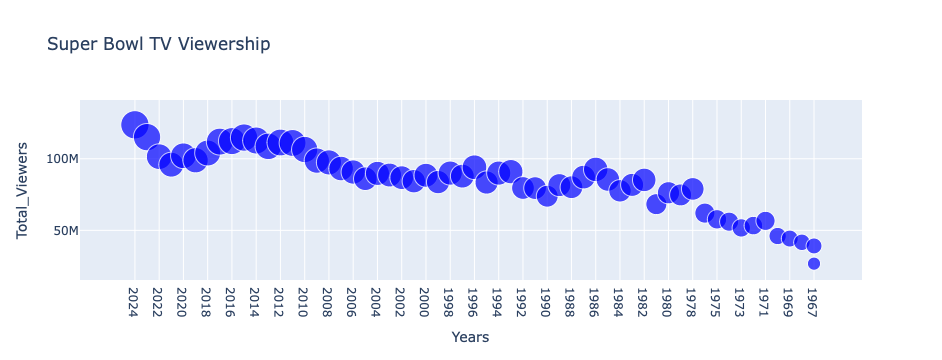

In [55]:
import pandas as pd
import plotly.express as px

# Sample DataFrame
bubble_chart_data = {
    'Total_Viewers': ['123,714,000', '115,096,000', '101,470,000', '95,877,000', '102,086,000', '98,950,000',
                      '104,016,000', '111,973,000', '112,336,000', '114,810,000', '112,752,000', '108,693,000',
                      '111,346,000', '111,041,000', '106,476,000', '98,732,000', '97,448,000', '93,184,000',
                      '90,745,000', '86,072,000', '89,795,000', '88,637,000', '86,801,000', '84,335,000',
                      '88,465,000', '83,720,000', '90,000,000', '87,870,000', '94,080,000', '83,420,000',
                      '90,000,000', '90,990,000', '79,590,000', '79,510,000', '73,852,000', '81,590,000',
                      '80,140,000', '87,190,000', '92,570,000', '85,530,000', '77,620,000', '81,770,000',
                      '85,240,000', '68,290,000', '76,240,000', '74,740,000', '78,940,000', '62,050,000',
                      '57,710,000', '56,050,000', '51,700,000', '53,320,000', '56,640,000', '46,040,000',
                      '44,270,000', '41,660,000', '39,120,000', '26,750,000', '24,430,000'],
    
    'Years': ['2024', '2023', '2022', '2021', '2020', '2019', 
             '2018', '2017', '2016', '2015', '2014', '2013', 
             '2012', '2011', '2010', '2009', '2008', '2007', 
             '2006', '2005', '2004', '2003', '2002', '2001', 
             '2000', '1999', '1998', '1997', '1996', '1995', 
             '1994', '1993', '1992', '1991', '1990', '1989', 
             '1988', '1987', '1986', '1985', '1984', '1983', 
             '1982', '1981', '1980', '1979', '1978', '1976', 
             '1975', '1974', '1973', '1972', '1971', '1970', 
             '1969', '1968', '1967', '1967']  # 58 entries
}

# Ensure both lists have the same length
# Trimming the longer list (Total_Viewers) to match the length of Years
bubble_chart_data['Total_Viewers'] = bubble_chart_data['Total_Viewers'][:len(bubble_chart_data['Years'])]

# Create DataFrame
bubble_chart_df = pd.DataFrame(bubble_chart_data)

# Convert 'Total_Viewers' to numeric by removing commas
bubble_chart_df['Total_Viewers'] = pd.to_numeric(bubble_chart_df['Total_Viewers'].str.replace(',', ''), errors='coerce')

# Create the bubble chart
fig = px.scatter(bubble_chart_df, x='Years', y='Total_Viewers', size='Total_Viewers', 
                                  title='Super Bowl TV Viewership')
# Customize appearance
fig.update_traces(marker=dict(color="blue"))

# Show the chart
fig.show()


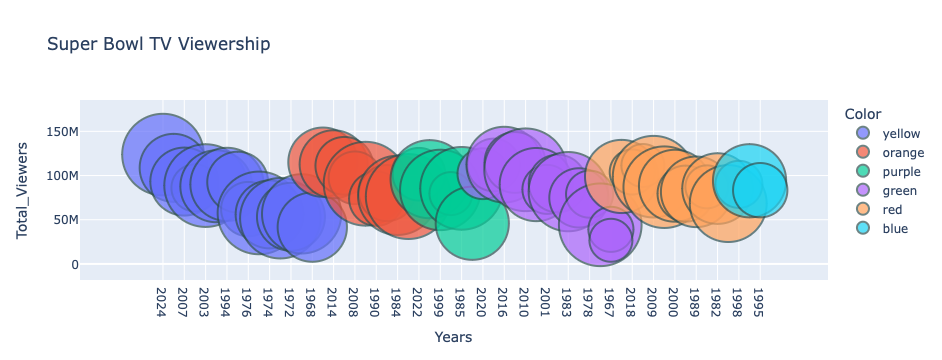

In [56]:
import pandas as pd
import plotly.express as px
import numpy as np

# Sample DataFrame
bubble_chart_data = {
    'Total_Viewers': ['123,714,000', '115,096,000', '101,470,000', '95,877,000', '102,086,000', '98,950,000',
                      '104,016,000', '111,973,000', '112,336,000', '114,810,000', '112,752,000', '108,693,000',
                      '111,346,000', '111,041,000', '106,476,000', '98,732,000', '97,448,000', '93,184,000',
                      '90,745,000', '86,072,000', '89,795,000', '88,637,000', '86,801,000', '84,335,000',
                      '88,465,000', '83,720,000', '90,000,000', '87,870,000', '94,080,000', '83,420,000',
                      '90,000,000', '90,990,000', '79,590,000', '79,510,000', '73,852,000', '81,590,000',
                      '80,140,000', '87,190,000', '92,570,000', '85,530,000', '77,620,000', '81,770,000',
                      '85,240,000', '68,290,000', '76,240,000', '74,740,000', '78,940,000', '62,050,000',
                      '57,710,000', '56,050,000', '51,700,000', '53,320,000', '56,640,000', '46,040,000',
                      '44,270,000', '41,660,000', '39,120,000', '26,750,000', '24,430,000'],
    
    'Years': ['2024', '2023', '2022', '2021', '2020', '2019', 
             '2018', '2017', '2016', '2015', '2014', '2013', 
             '2012', '2011', '2010', '2009', '2008', '2007', 
             '2006', '2005', '2004', '2003', '2002', '2001', 
             '2000', '1999', '1998', '1997', '1996', '1995', 
             '1994', '1993', '1992', '1991', '1990', '1989', 
             '1988', '1987', '1986', '1985', '1984', '1983', 
             '1982', '1981', '1980', '1979', '1978', '1976', 
             '1975', '1974', '1973', '1972', '1971', '1970', 
             '1969', '1968', '1967', '1967']
}

# Ensure both lists have the same length
bubble_chart_data['Total_Viewers'] = bubble_chart_data['Total_Viewers'][:len(bubble_chart_data['Years'])]

# Create DataFrame
bubble_chart_df = pd.DataFrame(bubble_chart_data)

# Convert 'Total_Viewers' to numeric by removing commas
bubble_chart_df['Total_Viewers'] = pd.to_numeric(bubble_chart_df['Total_Viewers'].str.replace(',', ''), errors='coerce')

# Create size and color columns
bubble_chart_df['Size'] = np.random.randint(10, 40, size=len(bubble_chart_df))  # Random sizes between 10 and 40
bubble_chart_df['Color'] = np.random.choice(['red', 'blue', 'green', 'orange', 'purple', 'yellow'], size=len(bubble_chart_df))  # Random colors

# Create the bubble chart
fig = px.scatter(bubble_chart_df, x='Years', y='Total_Viewers', size='Size', color='Color', 
                 title='Super Bowl TV Viewership', hover_name='Years', 
                 size_max=60)  # Adjust size_max for maximum bubble size

# Customize appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Show the chart
fig.show()


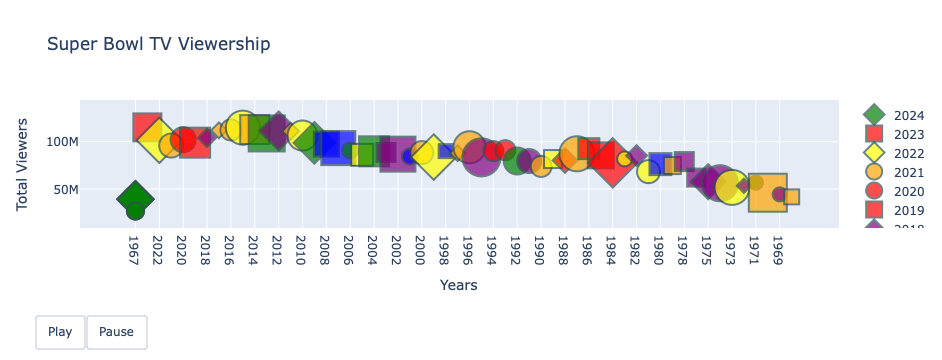

In [59]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Sample DataFrame
bubble_chart_data = {
    'Total_Viewers': ['123,714,000', '115,096,000', '101,470,000', '95,877,000', '102,086,000', '98,950,000',
                      '104,016,000', '111,973,000', '112,336,000', '114,810,000', '112,752,000', '108,693,000',
                      '111,346,000', '111,041,000', '106,476,000', '98,732,000', '97,448,000', '93,184,000',
                      '90,745,000', '86,072,000', '89,795,000', '88,637,000', '86,801,000', '84,335,000',
                      '88,465,000', '83,720,000', '90,000,000', '87,870,000', '94,080,000', '83,420,000',
                      '90,000,000', '90,990,000', '79,590,000', '79,510,000', '73,852,000', '81,590,000',
                      '80,140,000', '87,190,000', '92,570,000', '85,530,000', '77,620,000', '81,770,000',
                      '85,240,000', '68,290,000', '76,240,000', '74,740,000', '78,940,000', '62,050,000',
                      '57,710,000', '56,050,000', '51,700,000', '53,320,000', '56,640,000', '46,040,000',
                      '44,270,000', '41,660,000', '39,120,000', '26,750,000', '24,430,000'],
    
    'Years': ['2024', '2023', '2022', '2021', '2020', '2019', 
             '2018', '2017', '2016', '2015', '2014', '2013', 
             '2012', '2011', '2010', '2009', '2008', '2007', 
             '2006', '2005', '2004', '2003', '2002', '2001', 
             '2000', '1999', '1998', '1997', '1996', '1995', 
             '1994', '1993', '1992', '1991', '1990', '1989', 
             '1988', '1987', '1986', '1985', '1984', '1983', 
             '1982', '1981', '1980', '1979', '1978', '1976', 
             '1975', '1974', '1973', '1972', '1971', '1970', 
             '1969', '1968', '1967', '1967']
}

# Ensure both lists have the same length
bubble_chart_data['Total_Viewers'] = bubble_chart_data['Total_Viewers'][:len(bubble_chart_data['Years'])]

# Create DataFrame
bubble_chart_df = pd.DataFrame(bubble_chart_data)

# Convert 'Total_Viewers' to numeric by removing commas
bubble_chart_df['Total_Viewers'] = pd.to_numeric(bubble_chart_df['Total_Viewers'].str.replace(',', ''), errors='coerce')

# Create size and color columns
bubble_chart_df['Size'] = np.random.randint(10, 40, size=len(bubble_chart_df))  # Random sizes between 10 and 40
bubble_chart_df['Color'] = np.random.choice(['red', 'blue', 'green', 'orange', 'purple', 'yellow'], size=len(bubble_chart_df))  # Random colors
bubble_chart_df['Shape'] = np.random.choice(['circle', 'square', 'diamond'], size=len(bubble_chart_df))  # Random shapes

# Create the animated bubble chart using plotly.graph_objects
fig = go.Figure()

# Loop through each year to create individual traces for the animation
for year in bubble_chart_df['Years']:
    year_data = bubble_chart_df[bubble_chart_df['Years'] == year]
    
    # Add scatter traces for different shapes
    fig.add_trace(go.Scatter(
        x=year_data['Years'],
        y=year_data['Total_Viewers'],
        mode='markers',
        marker=dict(
            size=year_data['Size'],
            color=year_data['Color'],
            symbol=year_data['Shape'].replace({'circle': 'circle', 'square': 'square', 'diamond': 'diamond'}),
            line=dict(width=2, color='DarkSlateGrey')
        ),
        name=year,
        hoverinfo='text',
        text=f"Year: {year}<br>Total Viewers: {year_data['Total_Viewers'].values[0]:,.0f}"
    ))

# Update layout
fig.update_layout(
    title='Super Bowl TV Viewership',
    xaxis_title='Years',
    yaxis_title='Total Viewers',
    showlegend=True
)

# Create animation by setting frames
frames = [go.Frame(data=[go.Scatter(
    x=bubble_chart_df[bubble_chart_df['Years'] == year]['Years'],
    y=bubble_chart_df[bubble_chart_df['Years'] == year]['Total_Viewers'],
    mode='markers',
    marker=dict(
        size=bubble_chart_df[bubble_chart_df['Years'] == year]['Size'],
        color=bubble_chart_df[bubble_chart_df['Years'] == year]['Color'],
        symbol=bubble_chart_df[bubble_chart_df['Years'] == year]['Shape'].replace({'circle': 'circle', 'square': 'square', 'diamond': 'diamond'}),
        line=dict(width=2, color='DarkSlateGrey')
    ),
    hoverinfo='text',
    text=f"Year: {year}<br>Total Viewers: {bubble_chart_df[bubble_chart_df['Years'] == year]['Total_Viewers'].values[0]:,.0f}"
)]) for year in bubble_chart_df['Years']]

# Add frames to the figure
fig.frames = frames

# Add play button for the animation
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Show the chart
fig.show()


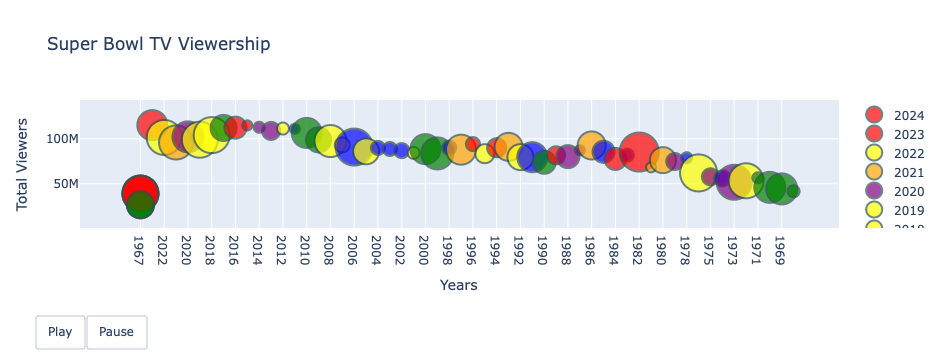

In [60]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Sample DataFrame
bubble_chart_data = {
    'Total_Viewers': ['123,714,000', '115,096,000', '101,470,000', '95,877,000', '102,086,000', '98,950,000',
                      '104,016,000', '111,973,000', '112,336,000', '114,810,000', '112,752,000', '108,693,000',
                      '111,346,000', '111,041,000', '106,476,000', '98,732,000', '97,448,000', '93,184,000',
                      '90,745,000', '86,072,000', '89,795,000', '88,637,000', '86,801,000', '84,335,000',
                      '88,465,000', '83,720,000', '90,000,000', '87,870,000', '94,080,000', '83,420,000',
                      '90,000,000', '90,990,000', '79,590,000', '79,510,000', '73,852,000', '81,590,000',
                      '80,140,000', '87,190,000', '92,570,000', '85,530,000', '77,620,000', '81,770,000',
                      '85,240,000', '68,290,000', '76,240,000', '74,740,000', '78,940,000', '62,050,000',
                      '57,710,000', '56,050,000', '51,700,000', '53,320,000', '56,640,000', '46,040,000',
                      '44,270,000', '41,660,000', '39,120,000', '26,750,000', '24,430,000'],
    
    'Years': ['2024', '2023', '2022', '2021', '2020', '2019', 
             '2018', '2017', '2016', '2015', '2014', '2013', 
             '2012', '2011', '2010', '2009', '2008', '2007', 
             '2006', '2005', '2004', '2003', '2002', '2001', 
             '2000', '1999', '1998', '1997', '1996', '1995', 
             '1994', '1993', '1992', '1991', '1990', '1989', 
             '1988', '1987', '1986', '1985', '1984', '1983', 
             '1982', '1981', '1980', '1979', '1978', '1976', 
             '1975', '1974', '1973', '1972', '1971', '1970', 
             '1969', '1968', '1967', '1967']
}

# Ensure both lists have the same length
bubble_chart_data['Total_Viewers'] = bubble_chart_data['Total_Viewers'][:len(bubble_chart_data['Years'])]

# Create DataFrame
bubble_chart_df = pd.DataFrame(bubble_chart_data)

# Convert 'Total_Viewers' to numeric by removing commas
bubble_chart_df['Total_Viewers'] = pd.to_numeric(bubble_chart_df['Total_Viewers'].str.replace(',', ''), errors='coerce')

# Create size and color columns
bubble_chart_df['Size'] = np.random.randint(10, 40, size=len(bubble_chart_df))  # Random sizes between 10 and 40
bubble_chart_df['Color'] = np.random.choice(['red', 'blue', 'green', 'orange', 'purple', 'yellow'], size=len(bubble_chart_df))  # Random colors

# Create the animated bubble chart using plotly.graph_objects
fig = go.Figure()

# Loop through each year to create individual traces for the animation
for year in bubble_chart_df['Years']:
    year_data = bubble_chart_df[bubble_chart_df['Years'] == year]
    
    # Add scatter traces for different shapes and colors
    fig.add_trace(go.Scatter(
        x=year_data['Years'],
        y=year_data['Total_Viewers'],
        mode='markers',
        marker=dict(
            size=year_data['Size'],
            color=year_data['Color'],
            line=dict(width=2, color='DarkSlateGrey')
        ),
        name=year,
        hoverinfo='text',
        text=f"Year: {year}<br>Total Viewers: {year_data['Total_Viewers'].values[0]:,.0f}"
    ))

# Update layout
fig.update_layout(
    title='Super Bowl TV Viewership',
    xaxis_title='Years',
    yaxis_title='Total Viewers',
    showlegend=True
)

# Create animation by setting frames
frames = [go.Frame(data=[go.Scatter(
    x=bubble_chart_df[bubble_chart_df['Years'] == year]['Years'],
    y=bubble_chart_df[bubble_chart_df['Years'] == year]['Total_Viewers'],
    mode='markers',
    marker=dict(
        size=bubble_chart_df[bubble_chart_df['Years'] == year]['Size'],
        color=bubble_chart_df[bubble_chart_df['Years'] == year]['Color'],
        line=dict(width=2, color='DarkSlateGrey')
    ),
    hoverinfo='text',
    text=f"Year: {year}<br>Total Viewers: {bubble_chart_df[bubble_chart_df['Years'] == year]['Total_Viewers'].values[0]:,.0f}"
)]) for year in bubble_chart_df['Years']]

# Add frames to the figure
fig.frames = frames

# Add play button for the animation
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Show the chart
fig.show()


**Bubble Chart Observations:** Shows the relationship between two variables. This particular bubble chart is show the 
relationship between Years and Total Viewers. For example, in 1967 there were 100 Million+ viewers.

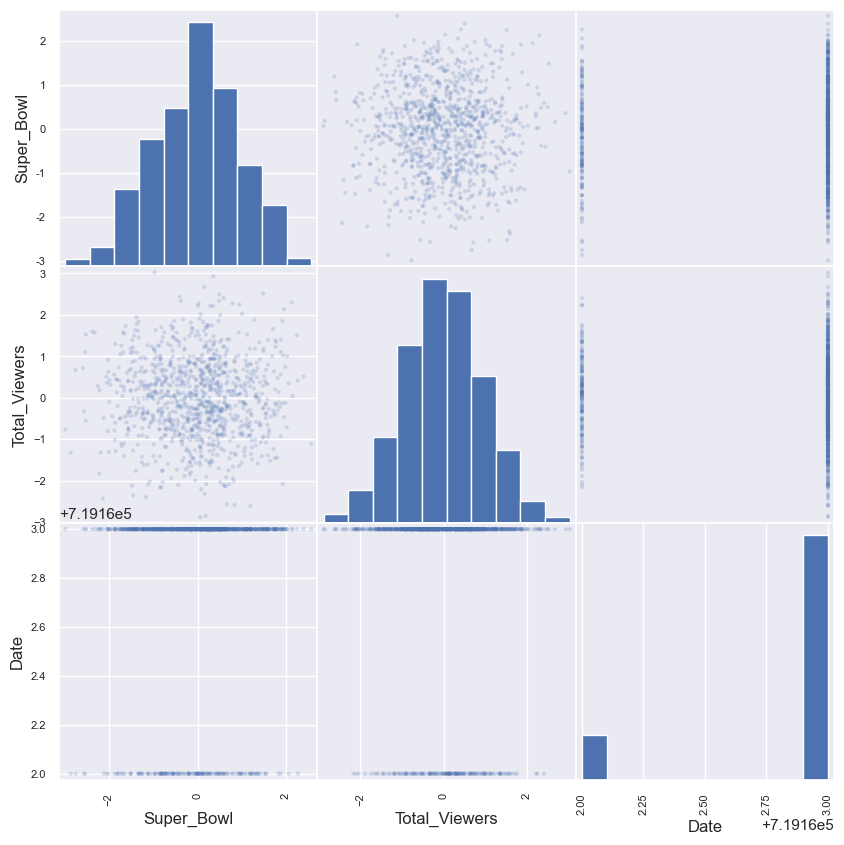

In [19]:
#Scatterplot Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random DataFrame
df = pd.DataFrame(np.random.randn(1000, 4), columns=['Super_Bowl', 'Network(s)', 'Total_Viewers', 'Date'])

# For demonstration purposes, convert 'Date' column to datetime and then to numeric (timestamp)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

# Optionally, drop or encode categorical columns
df_numeric = df.drop(columns=['Network(s)'])  # Drop non-numeric column

# Plot the scatter matrix with numeric columns only
pd.plotting.scatter_matrix(df_numeric, alpha=0.2, figsize=(10, 10))

# Show plot
plt.show()

**Scatterplot Matrix Observations**:The scatterplot matrix (a.k.a pairplot) is a grid of scatter plots that shows relationshps between variables. When analyzing a scatterplot, we are looking for correlations and clusters/patterns. There is clustering for the following pair Super Bowl and Total Viewers. This indictates that there are subgroups like Super Bowls with similiar Total Viewers. While there is no correlation between Super Bowl and Date or Total Viewers and Date, which indidates that there is no relationship. 

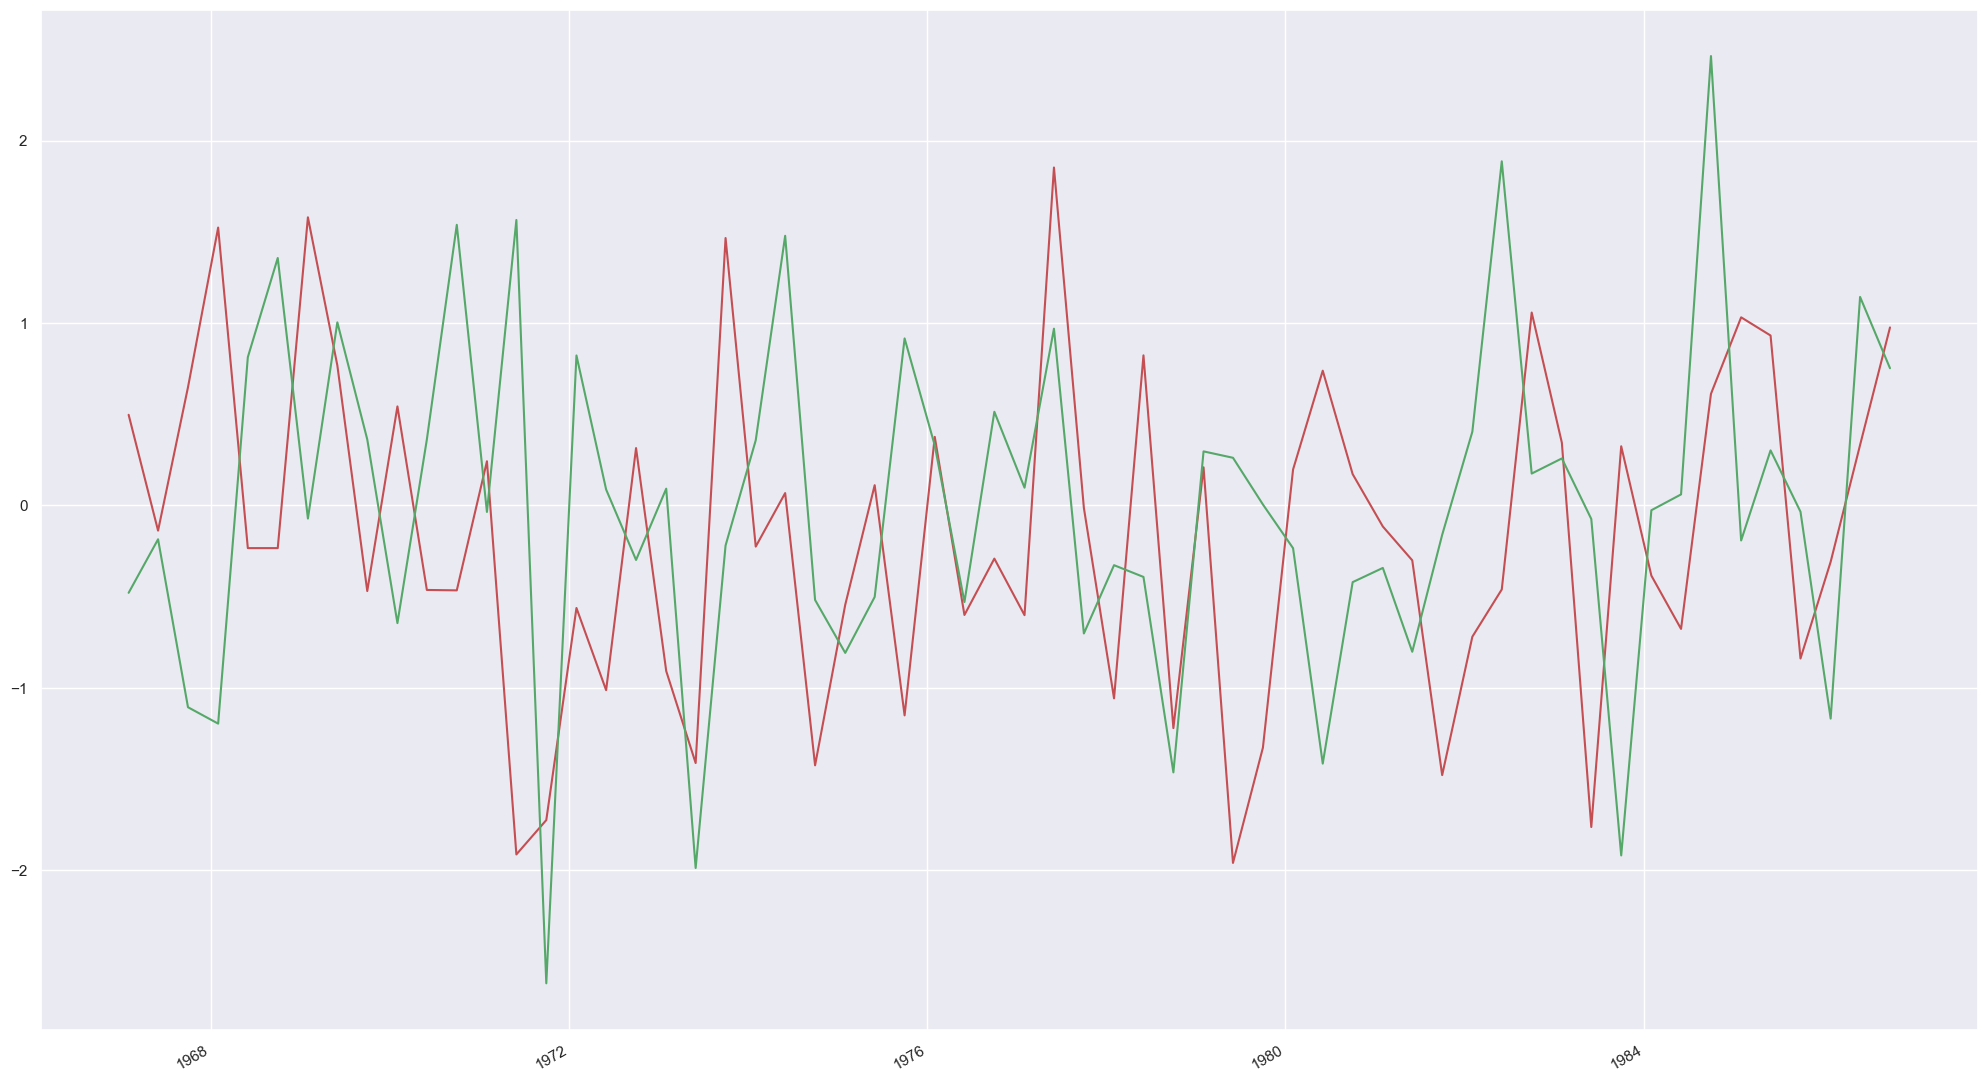

In [28]:
>>> np.random.seed(42)
>>> df = pd.DataFrame({'Total_Viewers': np.random.randn(60),
...                   'HHLD_Rating': np.random.randn(60)},
...                   index=pd.date_range("1/15/1967",
...                   freq='4MS', periods=60))
>>> with pd.plotting.plot_params.use("x_compat", True):
...     _ = df['Total_Viewers'].plot(color="r")
...     _ = df['HHLD_Rating'].plot(color="g")

**Plot Params**: Shows trends over time. The x-axis is time, and the y-axis is Total Viewers and HHLD Rating. Total Viewers is represented by red line while HHLD Rating is represented by a green line. The function np.random.seed(42) generates random numbers whenever you run the code. Total Viewers and HHLD Rating have arrays that select random numbers from the normal distribution. 4MS is every 4 months that equals 60 periods. There is some overlap between total viewers and hhld rating.

In [81]:
!pip install roman

# **Appendix**

1. Nielsen Website: used it to pull TV viewership for Super Bowl.
The "Super Bowl LVIII Draws 123.7 Million Average Viewers, Largest TV Audience on Record" Article publised on February 2024.Used 
Nielsen TV Audience: https://www.nielsen.com/news-center/2024/super-bowl-lviii-draws-123-7-million-average-viewers-largest-tv-audience-on-record/

2. Google Website: used to define and describe how Nielsen Ratings are calculated.
Google Search: https://www.google.com/search?q=what+does+the+hhld+rating+for+nielsen+rating&oq=what+does+the+hhld+rating+for+nielsen+rating&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigAdIBCTE3NDIzajBqN6gCALACAA&sourceid=chrome&ie=UTF-8

3. Forbes Website: used it to explain how the Nielsen Ratings are calculated.
The "What Are Nielsen Ratings And How Are They Calculated?" Article published on December 18,2015.
Forbes Nielsen Ratings: https://www.forbes.com/sites/seamuskirst/2015/12/18/what-are-nielsen-ratings-and-how-are-they-calculated/

4. Pandas Website: Python Code Documentation
Common place Python documentation for coding.
Pandas: https://pandas.pydata.org/docs/reference/plotting.html


In [173]:
#Notes
#Use this website: https://www.nielsen.com/news-center/2024/super-bowl-lviii-draws-123-7-million-average-viewers-largest-tv-audience-on-record/
#Method 1: Use web scrapping for the nielsen rating table
#Reference Module 11 for Web Scrapping referenced Homework 11 part 2
#Method 2: Copy tale in excel and save a csv file
#Method 3: Manually input the data and save as a csv file
#Side note: Can use number as intergers. Numbers do not have to be a float for this dataset.

# **Bonus:** Convert the Roman Numerals to Intergers

In [38]:
def roman_to_int(s: str) -> int:
    roman_dict = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    total = 0
    prev_value = 0
    for char in reversed(s):
        value = roman_dict[char]
        if value < prev_value:
            total -= value
        else:
            total += value
        prev_value = value
    return total

# Convert Roman numeral to integer, then to float
roman_numeral = 'LVIII'
integer_value = roman_to_int(roman_numeral)
float_value = float(integer_value)

print(float_value)


58.0


In [ ]:
#Ask for help

# Roman numeral conversion function
def roman_to_int(s: str) -> int:
    roman_dict = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    total = 0
    prev_value = 0
    for char in reversed(s):
        value = roman_dict.get(char, 0)  # Get value or 0 if not a Roman numeral
        if value < prev_value:
            total -= value
        else:
            total += value
        prev_value = value
    return total

# Apply conversion, ignoring rows like 'SB 50'
roman_numeral = {'Super_Bowl':['LVIII', 'LVII', 'LVI', 'LV', 'LIV', 'LIII', 'LII', 'LI', 'XLIX', 'XLVIII', 'XLVII',
                   'XLVI', 'XLV', 'XLIV', 'XLIII', 'XLII', 'XLI', 'XL', 'XXXIX', 'XXXVIII', 'XXXVII', 'XXXVI', 
                   'XXXV', 'XXXIV', 'XXXIII', 'XXXII', 'XXXI', 'XXX', 'XXIX', 'XXVIII', 'XXVII', 'XXVI', 
                   'XXV', 'XXIV', 'XXIII', 'XXII', 'XXI', 'XX', 'XIX', 'XVIII', 'XVII', 'XVI', 'XV', 'XIV', 
                   'XIII', 'XII', 'XI', 'X', 'IX', 'VIII', 'VII', 'VI', 'V', 'IV', 'III', 'II', 'I', 'I','LVIII']}
integer_value = roman_to_int(roman_numeral)
float_value = float(integer_value)

print(float_value)
df['Super_Bowl'].head()

In [82]:
import roman